# Assignment 1
The questions below relate to the data files associated with the contest with the title 'DengAI: Predicting Disease Spread' published at the following website. 
https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/data/

Anyone can join the contest and showcase your skills. To know about contest submissions visit the following webpage
https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/submissions/

You can showcase your Machine Learning skills by ranking top in the contest. 

Problem description:

Your goal is to predict the total_cases label for each (city, year, weekofyear) in the test set. There are two cities, San Juan and Iquitos, with test data for each city spanning 5 and 3 years respectively. You will make one submission that contains predictions for both cities. The data for each city have been concatenated along with a city column indicating the source: sj for San Juan and iq for Iquitos. The test set is a pure future hold-out, meaning the test data are sequential and non-overlapping with any of the training data. Throughout, missing values have been filled as NaNs.

Assignment:

The goal is achieved through three subsequent Assignments 1, 2 and 3, all using the same dataset


The features in this dataset
You are provided the following set of information on a (year, weekofyear) timescale:

(Where appropriate, units are provided as a _unit suffix on the feature name.)

City and date indicators

    city – City abbreviations: sj for San Juan and iq for Iquitos
    week_start_date – Date given in yyyy-mm-dd format

NOAA's GHCN daily climate data weather station measurements

    station_max_temp_c – Maximum temperature
    station_min_temp_c – Minimum temperature
    station_avg_temp_c – Average temperature
    station_precip_mm – Total precipitation
    station_diur_temp_rng_c – Diurnal temperature range
    
PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)

    precipitation_amt_mm – Total precipitation

NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)

    reanalysis_sat_precip_amt_mm – Total precipitation
    reanalysis_dew_point_temp_k – Mean dew point temperature
    reanalysis_air_temp_k – Mean air temperature
    reanalysis_relative_humidity_percent – Mean relative humidity
    reanalysis_specific_humidity_g_per_kg – Mean specific humidity
    reanalysis_precip_amt_kg_per_m2 – Total precipitation
    reanalysis_max_air_temp_k – Maximum air temperature
    reanalysis_min_air_temp_k – Minimum air temperature
    reanalysis_avg_temp_k – Average air temperature
    reanalysis_tdtr_k – Diurnal temperature range

Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements

    ndvi_se – Pixel southeast of city centroid
    ndvi_sw – Pixel southwest of city centroid
    ndvi_ne – Pixel northeast of city centroid
    ndvi_nw – Pixel northwest of city centroid

1. Load the file 'dengue_features_train.csv', display the top 3 rows and observe the data. Then programmatically define the column names to make the following changes. 

In [2]:
import pandas as pd
#Set working directory
df = pd.read_csv('dengue_features_train.csv')

#df.columns = df.columns.str.replace()
df.city = df.city.astype('category')


a). rename columns which have 'station' such that 'station' is abbreviated to 'stn' and rest of column name remains intact. For example column name 'station_diur_temp_rng_c' is renamed to 'station_diur_tmp_rng_c'

b). similarly rename columns which have 'reanalysis' to abbreviate 're_an', retaining rest of column name same

c). rename columns which have 'humidity' to abbreviate to 'hd', retaining rest of column name same

d). abbreviate 'precipitation' part of column name to 'prec', retaining rest of column name same

e). view top 3 rows and recheck if column name changes have taken effect

In [3]:
df.columns=df.columns.str.replace('station','stn')
df.columns=df.columns.str.replace('reanalysis','re_an')
df.columns=df.columns.str.replace('humidity','hd')
df.columns=df.columns.str.replace('precipitation','prec')
df.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,...,re_an_precip_amt_kg_per_m2,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm
0,sj,1990,18,1990-04-30,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4


f). check the type of columns in dataframe

In [4]:
print(df.dtypes)

city                          category
year                             int64
weekofyear                       int64
week_start_date                 object
ndvi_ne                        float64
ndvi_nw                        float64
ndvi_se                        float64
ndvi_sw                        float64
prec_amt_mm                    float64
re_an_air_temp_k               float64
re_an_avg_temp_k               float64
re_an_dew_point_temp_k         float64
re_an_max_air_temp_k           float64
re_an_min_air_temp_k           float64
re_an_precip_amt_kg_per_m2     float64
re_an_relative_hd_percent      float64
re_an_sat_precip_amt_mm        float64
re_an_specific_hd_g_per_kg     float64
re_an_tdtr_k                   float64
stn_avg_temp_c                 float64
stn_diur_temp_rng_c            float64
stn_max_temp_c                 float64
stn_min_temp_c                 float64
stn_precip_mm                  float64
dtype: object


g). Change the column 'year' as categorical variable and check if the column data type is changed and the levels of category are correct. As an example, 'city' is converted into categorical below with two categories (of cities).

In [5]:
df.city = df.city.astype('category')
df.year = df.year.astype('category')
print(df.dtypes)

city                          category
year                          category
weekofyear                       int64
week_start_date                 object
ndvi_ne                        float64
ndvi_nw                        float64
ndvi_se                        float64
ndvi_sw                        float64
prec_amt_mm                    float64
re_an_air_temp_k               float64
re_an_avg_temp_k               float64
re_an_dew_point_temp_k         float64
re_an_max_air_temp_k           float64
re_an_min_air_temp_k           float64
re_an_precip_amt_kg_per_m2     float64
re_an_relative_hd_percent      float64
re_an_sat_precip_amt_mm        float64
re_an_specific_hd_g_per_kg     float64
re_an_tdtr_k                   float64
stn_avg_temp_c                 float64
stn_diur_temp_rng_c            float64
stn_max_temp_c                 float64
stn_min_temp_c                 float64
stn_precip_mm                  float64
dtype: object


In [6]:
print(df['year'].cat.categories)

Int64Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
           dtype='int64')


2. The predictor column (y-value) is present in the file 'dengue_labels_train.csv'. Read this file in a new dataframe and merge it with the above dataframe using city, year and weekofyear as join conditions. 

Count NANs in merged dataframe and use forward fill method to fill NANs (df_merged.fillna(method='ffill'))

In [7]:
df1=pd.read_csv('dengue_labels_train.csv')
df_merged = pd.merge(df,df1)

In [8]:
df_merged.isnull().sum()

city                            0
year                            0
weekofyear                      0
week_start_date                 0
ndvi_ne                       194
ndvi_nw                        52
ndvi_se                        22
ndvi_sw                        22
prec_amt_mm                    13
re_an_air_temp_k               10
re_an_avg_temp_k               10
re_an_dew_point_temp_k         10
re_an_max_air_temp_k           10
re_an_min_air_temp_k           10
re_an_precip_amt_kg_per_m2     10
re_an_relative_hd_percent      10
re_an_sat_precip_amt_mm        13
re_an_specific_hd_g_per_kg     10
re_an_tdtr_k                   10
stn_avg_temp_c                 43
stn_diur_temp_rng_c            43
stn_max_temp_c                 20
stn_min_temp_c                 14
stn_precip_mm                  22
total_cases                     0
dtype: int64

In [9]:
df_merged=df_merged.fillna(method='ffill')
df_merged.isnull().sum()

city                          0
year                          0
weekofyear                    0
week_start_date               0
ndvi_ne                       0
ndvi_nw                       0
ndvi_se                       0
ndvi_sw                       0
prec_amt_mm                   0
re_an_air_temp_k              0
re_an_avg_temp_k              0
re_an_dew_point_temp_k        0
re_an_max_air_temp_k          0
re_an_min_air_temp_k          0
re_an_precip_amt_kg_per_m2    0
re_an_relative_hd_percent     0
re_an_sat_precip_amt_mm       0
re_an_specific_hd_g_per_kg    0
re_an_tdtr_k                  0
stn_avg_temp_c                0
stn_diur_temp_rng_c           0
stn_max_temp_c                0
stn_min_temp_c                0
stn_precip_mm                 0
total_cases                   0
dtype: int64

In [10]:
df_merged.to_csv (r'C:\Users\18132\Desktop\My Docs\DSP\Ass_2\df_merged.csv', index = False, header=True)

a). Do a random check by printing few values from both files and merged file

In [11]:
df.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,...,re_an_precip_amt_kg_per_m2,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm
0,sj,1990,18,1990-04-30,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4


In [12]:
df1.head(3)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4


In [13]:
df_merged.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,...,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4


b). Do a scatter plot of weekofyear on x-axis and total_cases on y-axis and observe if there is a relationship.

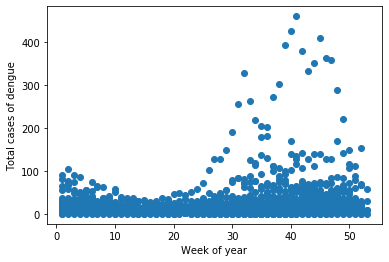

In [15]:
import matplotlib.pyplot as plt
plt.scatter(df_merged['weekofyear'],df_merged['total_cases'])
plt.xlabel('Week of year')
plt.ylabel('Total cases of dengue')
plt.show()

For most of the weeks the total number of cases remain constant, but for very few weeks compared to all the weeks, the cases are increasing exponentially, which may be considered as outliers.

c). Do a box plot to observe the density of data and if it complies to Central Limit Theorem (for large enough data, mean of sample is mean of population, or data is tightly packed close to the mean)

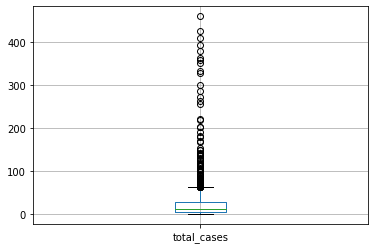

In [16]:
df_merged.boxplot(column=['total_cases'])

As we can see most of the data is above the maximum value in the boxplot, we can apply central limit theorem and check the data

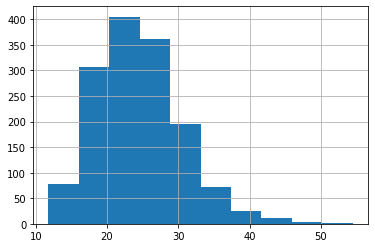

In [26]:
#Central Limit Theorem
sampled_mean=[]
for i in range(df_merged.shape[0]):
# Take a random sample of 50 rows from the population, take the mean of those rows, append to sampled_mean
    sampled_mean.append(df_merged['total_cases'].sample(n=50).mean())
pd.Series(sampled_mean).hist()

In [27]:
# View the mean of the sampled_mean
pd.Series(sampled_mean).mean()

24.493983516483507

In [28]:
# Subtract Mean Sample Mean From True Population Mean
error = df_merged['total_cases'].mean() - pd.Series(sampled_mean).mean()

# Print
print('The Mean Sample Mean is only %f different the True Population mean!' % error)

The Mean Sample Mean is only 0.181154 different the True Population mean!


d). Find the mean, min, max and standard deviation of total_cases by city

In [318]:
df_sj=df_merged.loc[df_merged['city']=='sj']
df_iq=df_merged.loc[df_merged['city']=='iq']
df_sj['total_cases'].describe()


count    936.000000
mean      34.180556
std       51.381372
min        0.000000
25%        9.000000
50%       19.000000
75%       37.000000
max      461.000000
Name: total_cases, dtype: float64

In [319]:
df_iq['total_cases'].describe()

count    520.000000
mean       7.565385
std       10.765478
min        0.000000
25%        1.000000
50%        5.000000
75%        9.000000
max      116.000000
Name: total_cases, dtype: float64

e). Read the relationship between mean and standard deviation from the link given here and describe the data of total_cases by city, if there is too much variation or too little variation https://www-users.york.ac.uk/~mb55/msc/applbio/week3/sd_text.pdf

In [321]:
import numpy as np
Q1=np.percentile(df_sj['total_cases'],25)
Q3=np.percentile(df_sj['total_cases'],75)

IQR=Q3-Q1
print(IQR)
cut_off = IQR * 1.5
lower, upper = Q1- cut_off, Q3 + cut_off
print(Q1,Q3,IQR,lower,upper)
outliers = [x for x in df_sj['total_cases']  if x < lower or x > upper]
out_num=len(outliers)# number of outliers of total cases
tot_num=len(df_sj['total_cases']) # total number of observation of total cases
per=out_num/tot_num*100
print(per)

28.0
9.0 37.0 28.0 -33.0 79.0
7.905982905982905


In [323]:
q1=np.percentile(df_iq['total_cases'],25)
q3=np.percentile(df_iq['total_cases'],75)

iqr=q3-q1
print(iqr)
cut_off_iq = iqr * 1.5
lower_iq, upper_iq = q1- cut_off_iq, q3 + cut_off_iq
print(q1,q3,iqr,lower_iq,upper_iq)
outliers_iq = [x for x in df_iq['total_cases']  if x < lower_iq or x > upper_iq]
out_num_iq=len(outliers_iq)# number of outliers of total cases
tot_num_iq=len(df_iq['total_cases']) # total number of observation of total cases
per_iq=out_num_iq/tot_num_iq*100
print(per_iq)

8.0
1.0 9.0 8.0 -11.0 21.0
8.461538461538462


As we can see from the above calculation that only 7.9% approx observations are too far from the mean in sj city and 8.4% approx observations in iq city, so we can say that we have very little variation in data 

3. How many years in the city iq have greater than or equal to 50 total_cases of dengue and in which years?

In [171]:
count=0
df_year=pd.DataFrame()
for index, row in df_merged.iterrows():
    if df_merged.loc[index,'city']=='iq':
        if df_merged.loc[index,'total_cases']>=50:
            count=count+1
            df_year.loc[index,'year']=df_merged.loc[index,'year']
            df_year.loc[index,'total_cases']=df_merged.loc[index,'total_cases']
            
print(count)       

5


In [172]:
df_year

,year,total_cases
1166,2004.0,83.0
1167,2004.0,116.0
1327,2008.0,58.0
1367,2008.0,63.0
1369,2008.0,50.0


4. Optional Question (no credit, or no extra credit): Find and remove the outliers to bring the mean and standard deviation closer to each other.

In [173]:
Q1=df_merged['total_cases'].quantile(0.25)
Q3=df_merged['total_cases'].quantile(0.75)
IQR=Q3-Q1
print(IQR)
df_out=pd.DataFrame()
df_out=df_merged[(df_merged['total_cases']<(Q1-1.5*IQR))|(df_merged['total_cases']>(Q3+1.5*IQR))]
df_out.shape

23.0


(124, 25)

df_out is a dataframe with outliers

In [174]:
df_noout=df_merged[~((df_merged['total_cases']<(Q1-1.5*IQR))|(df_merged['total_cases']>(Q3+1.5*IQR)))]
df_noout.shape

(1332, 25)

In [175]:
df_noout['total_cases'].describe()

count    1332.000000
mean       14.945195
std        14.281042
min         0.000000
25%         4.000000
50%        10.000000
75%        22.000000
max        62.000000
Name: total_cases, dtype: float64

5. Create a temp data frame by grouping the total_cases by weekofyear and draw a histogram of total_cases and provide insights based on the distribution. 

Extra point if all the plots have the following decorators:

Plot title

X-label, Y-label

X-ticks and y-ticks have proper sequence matching dataset, non overlapping text

Colored plots

Legend, if there is grouping in plot

In [212]:
df_temp=df_merged.groupby(['weekofyear']).agg({'total_cases':'sum'})
df_temp.reset_index(level=0, inplace=True)
df_temp

,weekofyear,total_cases
0,1,678
1,2,728
2,3,677
3,4,652
4,5,620
5,6,530
6,7,487
7,8,478
8,9,453
9,10,387


Text(0, 0.5, 'Total Cases of Dengue')

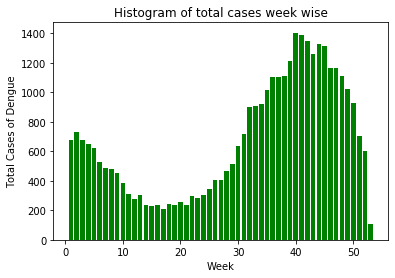

In [213]:
plt.bar(df_temp['weekofyear'],df_temp['total_cases'],color='green')
plt.title("Histogram of total cases week wise")
plt.xlabel('Week')
plt.ylabel('Total Cases of Dengue')

The distribution of the total cases of dengue week wise is mostly normally distributed, as we can see from week 20 the cases started increasing and then started decreasing fro week 45 around.